In [1]:
import hddm
import pandas as pd

In [2]:
hddm.__version__

'0.9.8RC'

In [3]:
import pickle

In [4]:
import numpy as np

In [10]:
# Load data from csv file into a pandas DataFrame
data = pd.read_csv('ep1_sorted.csv')
data

,subj_idx,leftV,rightV,keyPress,up_accept,response,rt,gain,loss,gPlusLoss
0,1,90,-50,1,1,1,1.480777,90,-50,40
1,1,50,-70,-1,1,0,0.756262,50,-70,-20
2,1,-30,70,1,1,1,2.499043,70,-30,40
3,1,80,-100,-1,1,0,0.871328,80,-100,-20
4,1,30,-50,1,-1,0,0.976021,30,-50,-20
...,...,...,...,...,...,...,...,...,...,...
7126,49,50,-10,1,-1,0,1.087452,50,-10,40
7127,49,70,-30,-1,1,0,0.838361,70,-30,40
7128,49,50,-30,-1,1,0,0.762101,50,-30,20
7129,49,-30,100,-1,-1,1,3.944780,100,-30,70


In [11]:
m = hddm.models.HDDMRegressor(data, ['v ~ gain + loss - 1'], include=(["v", "a", "t", "z"]), group_only_regressors=False)


No model attribute --> setting up standard HDDM
Set model to ddm


In [12]:
m.find_starting_values()


/opt/conda/lib/python3.8/site-packages/scipy/optimize/_optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


In [13]:
import os
modelName = 'no_alpha_ep1'
if not os.path.exists('savedModels/{}'.format(modelName)):
    os.makedirs('savedModels/{}'.format(modelName))

m.sample(5000, burn=1000, dbname='savedModels/{}/db_{}'.format(modelName, modelName), db='pickle')

 [-----------------100%-----------------] 5001 of 5000 complete in 5178.4 sechddm sampling elpased time:  5179.06 s


In [14]:
m.save('savedModels/{}/{}'.format(modelName, modelName))

In [5]:
modelName = "ep1"
m = hddm.load('savedModels/{}/{}'.format(modelName, modelName))

In [26]:
# Print the model statistics
m.print_stats()
m.dic

                         mean       std      2.5q       25q       50q       75q     97.5q    mc err
a                    2.192002  0.065807   2.06663  2.146985  2.191099  2.235609   2.32401  0.001581
a_std                0.422692  0.052694  0.332259  0.385383  0.419449  0.454779  0.535813  0.001467
a_subj.1             2.612128  0.151149  2.321502   2.50964  2.607971  2.709099  2.922389  0.005032
a_subj.2             1.999242  0.111926  1.795216  1.920788  1.996927  2.073294  2.223113  0.003328
a_subj.3             2.750012  0.156447  2.460134  2.641024  2.743033  2.855781  3.054794  0.004259
a_subj.4             2.118143  0.122652  1.895039  2.032149  2.115404  2.197885  2.363558   0.00425
a_subj.5             1.974618  0.252304  1.526132   1.79834  1.957616   2.13307  2.514267  0.009457
a_subj.6              2.07959  0.196295  1.757798  1.941416  2.055366   2.19463  2.525691  0.009404
a_subj.7             1.853599  0.126338  1.615508  1.767828  1.850925  1.935805  2.108705  0.004093


Plotting a
Plotting a_std
Plotting t
Plotting t_std
Plotting z
Plotting z_std
Plotting v_Intercept
Plotting v_Intercept_std
Plotting v_gain
Plotting v_gain_std
Plotting v_loss
Plotting v_loss_std


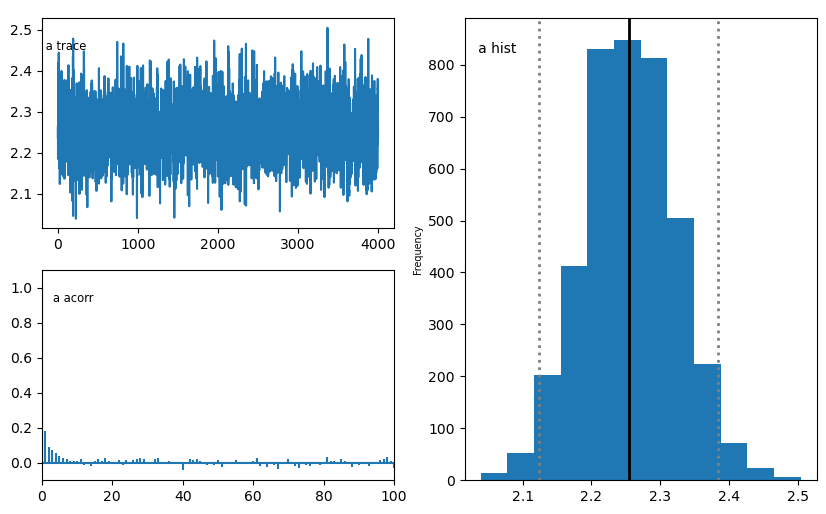

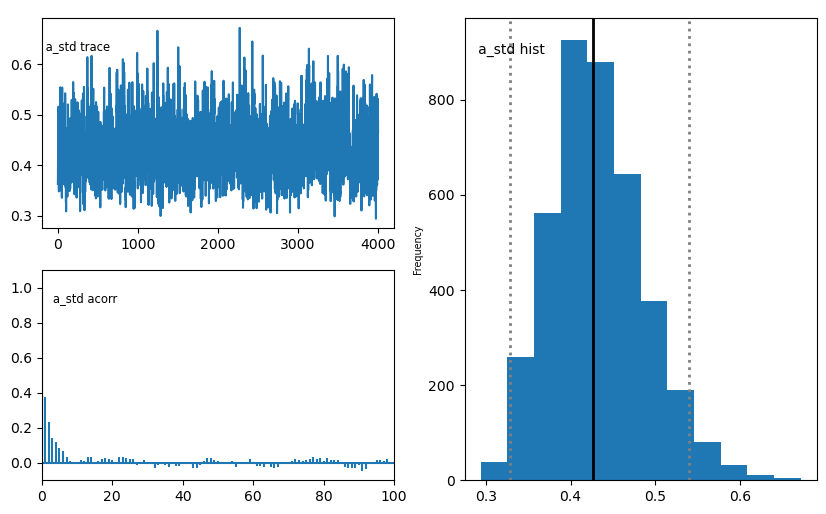

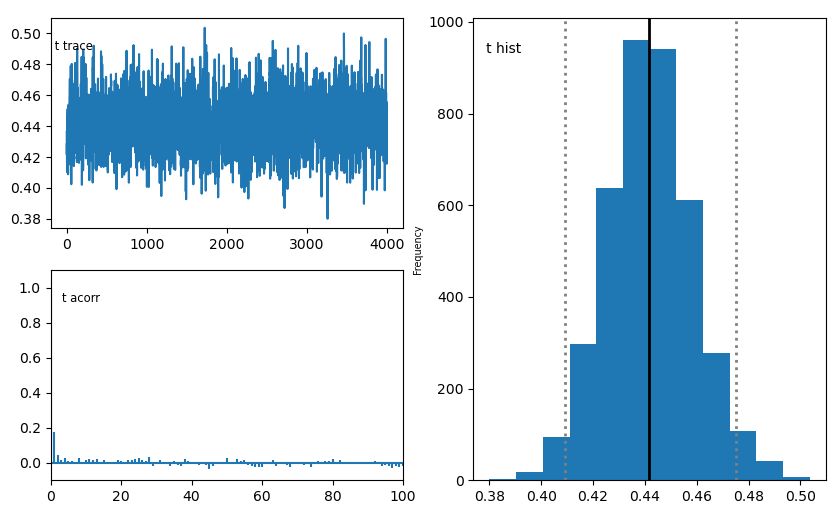

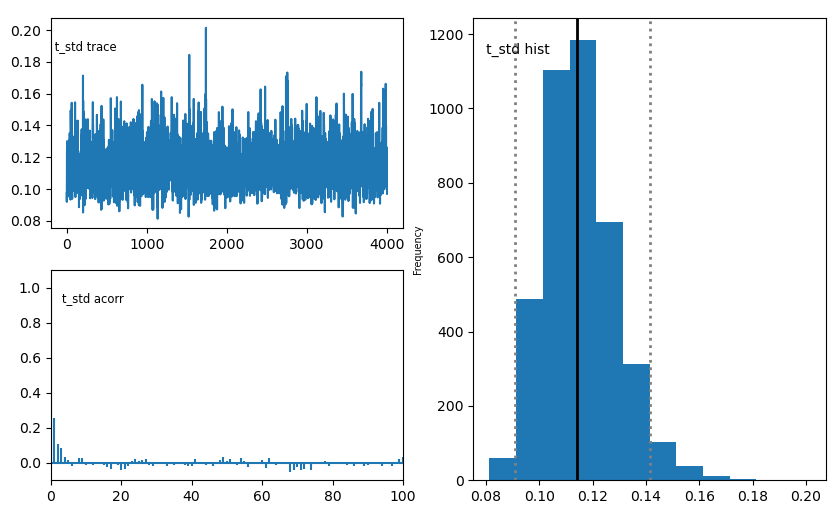

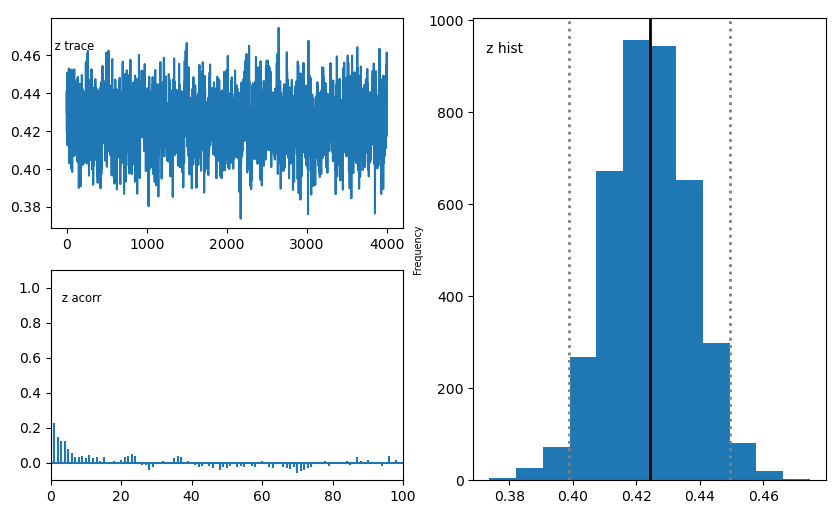

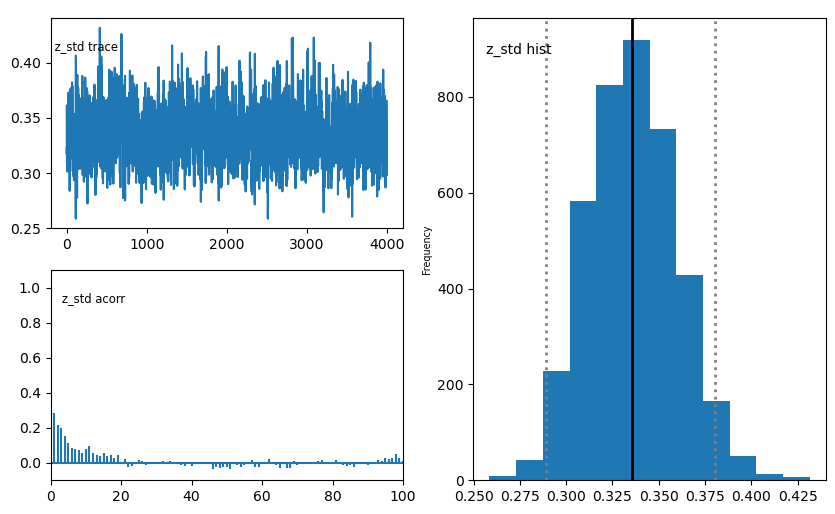

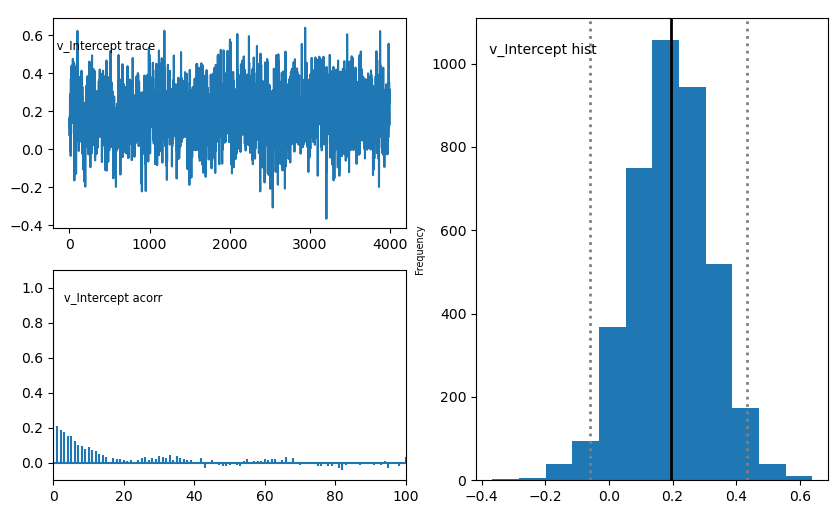

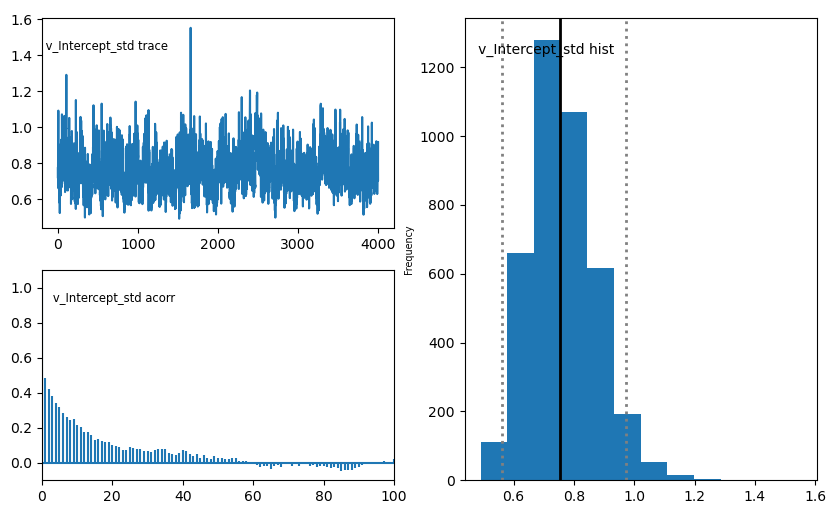

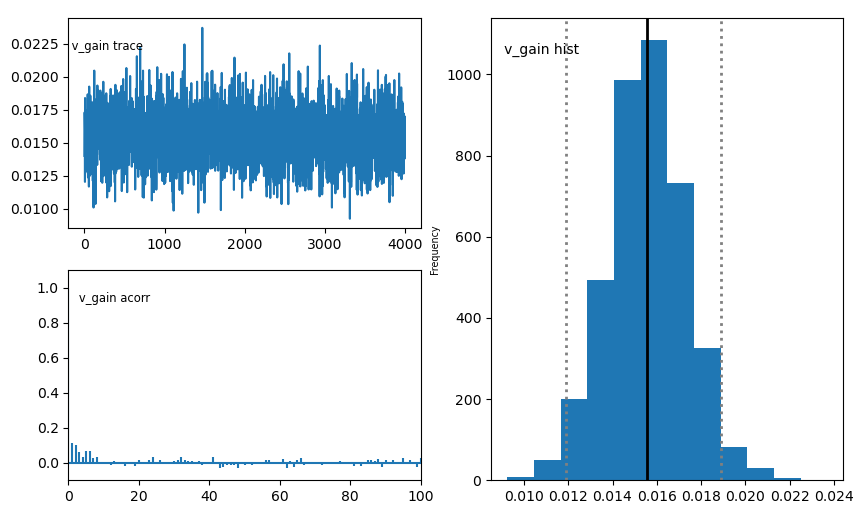

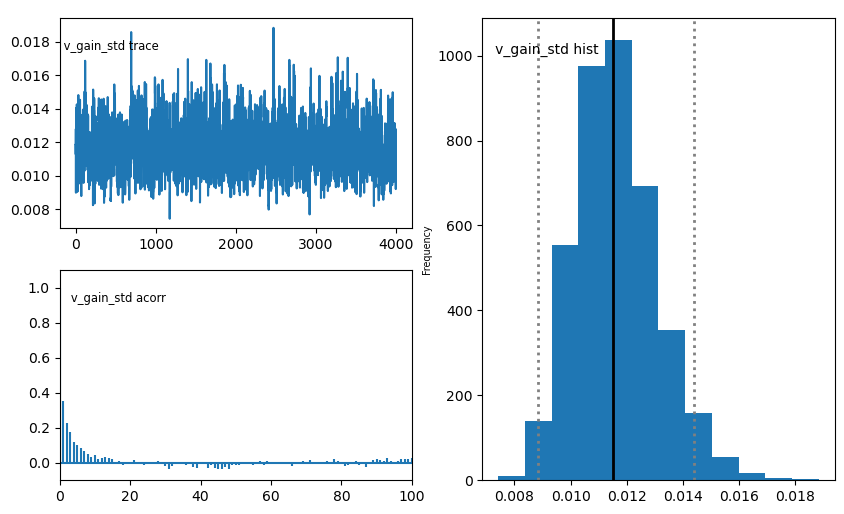

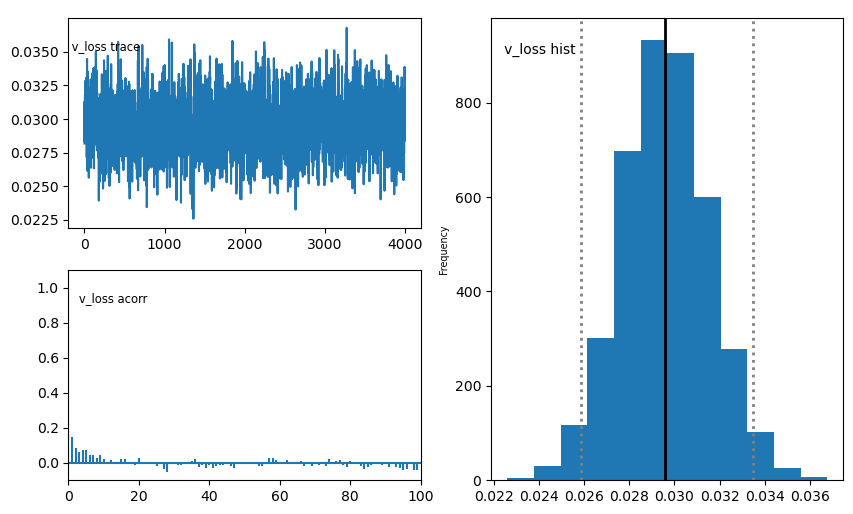

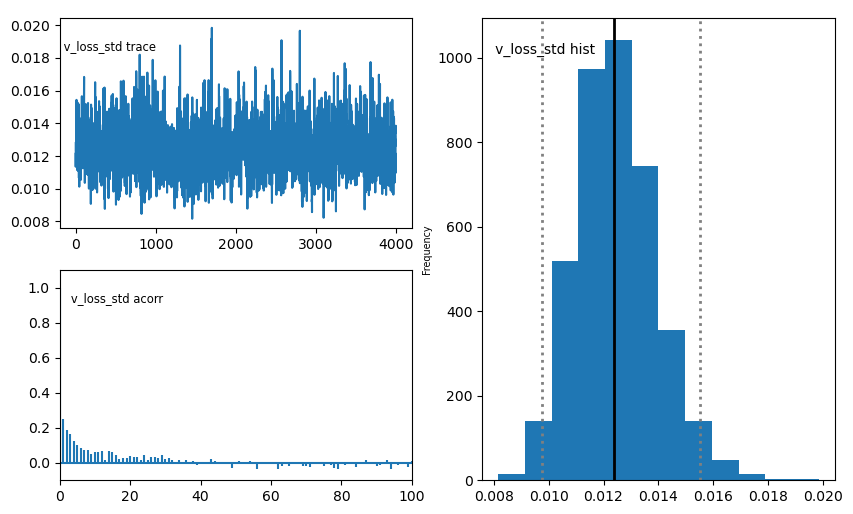

In [7]:
# Plot the posterior distributions
m.plot_posteriors()

In [8]:
import numpy as np
modelParamsDF = m.nodes_db
modelParamsDF.to_csv('savedModels/{}/{}_nodes.csv'.format(modelName, modelName))


In [9]:
print(modelParamsDF)

         knode_name stochastic observed   subj      node tag     depends   
a                 a       True    False  False         a  ()          []  \
a_std         a_std       True    False  False     a_std  ()          []   
a_rate       a_rate      False    False  False    a_rate  ()          []   
a_shape     a_shape      False    False  False   a_shape  ()          []   
a_subj.1     a_subj       True    False   True  a_subj.1  ()  [subj_idx]   
...             ...        ...      ...    ...       ...  ..         ...   
wfpt.45        wfpt      False     True  False   wfpt.45  ()  [subj_idx]   
wfpt.46        wfpt      False     True  False   wfpt.46  ()  [subj_idx]   
wfpt.47        wfpt      False     True  False   wfpt.47  ()  [subj_idx]   
wfpt.48        wfpt      False     True  False   wfpt.48  ()  [subj_idx]   
wfpt.49        wfpt      False     True  False   wfpt.49  ()  [subj_idx]   

         hidden subj_idx leftV  ... loss gPlusLoss      mean       std   
a         Fal

In [64]:
# group level mean of lambda
groupLevelMeanOfLambda = modelParamsDF.loc['v_loss', 'mean']/modelParamsDF.loc['v_gain', 'mean']
print("group level mean of lamdba is: ", round(groupLevelMeanOfLambda, 3))
# 95% CI for beta_G, beta_L
print("2.5% percentile for beta_L: ", round(modelParamsDF.loc['v_loss', '2.5q'], 3))
print("97.5% percentile for beta_G: ", round(modelParamsDF.loc['v_gain', '97.5q'], 3))

group level mean of lamdba is:  1.834
2.5% percentile for beta_L:  0.083
97.5% percentile for beta_G:  0.075


In [65]:
# how many participants have beta_L > beta_G, how many have the 95% CI greater?
# participant level mean (SD) of lambda
numSubjects = 49
numLambdaMean = 0
numLambdaCI = 0
allParticipantLambdas = []
for subjectIndex in range(1, numSubjects+1):
    beta_gain = modelParamsDF.loc['v_gain_subj.{}'.format(subjectIndex), 'mean']
    beta_loss = modelParamsDF.loc['v_loss_subj.{}'.format(subjectIndex), 'mean']
    beta_L_lowerBound = modelParamsDF.loc['v_loss_subj.{}'.format(subjectIndex), '2.5q']
    beta_G_upperBound = modelParamsDF.loc['v_gain_subj.{}'.format(subjectIndex), '97.5q']
    if beta_loss > beta_gain:
        numLambdaMean += 1
    if beta_L_lowerBound > beta_G_upperBound:
        numLambdaCI += 1
    lambdaForThisParticipant = beta_loss/beta_gain
    allParticipantLambdas.append(lambdaForThisParticipant)
print("Number of people with beta_L > beta_G = ", round(numLambdaMean, 3))
print("Number of people with 95% CI of beta_L > beta_G = ", numLambdaCI)
print("Average lambda over all individuals = {} (SD = {})".format(round(np.mean(allParticipantLambdas), 3), round(np.std(allParticipantLambdas), 3)))


Number of people with beta_L > beta_G =  41
Number of people with 95% CI of beta_L > beta_G =  34
Average lambda over all individuals = 2.166 (SD = 2.399)


In [66]:
# how many participants have beta_L > beta_G, how many have the 95% CI greater?
# participant level mean (SD) of lambda
numSubjects = 49
numLambdaMean = 0
numLambdaCI = 0
allParticipantLambdas = []

for subjectIndex in range(1, numSubjects+1):
    beta_gain = modelParamsDF.loc['v_gain_subj.{}'.format(subjectIndex), 'mean']
    beta_loss = modelParamsDF.loc['v_loss_subj.{}'.format(subjectIndex), 'mean']
    beta_L_lowerBound = modelParamsDF.loc['v_loss_subj.{}'.format(subjectIndex), '2.5q']
    beta_G_upperBound = modelParamsDF.loc['v_gain_subj.{}'.format(subjectIndex), '97.5q']
    
    if beta_loss > beta_gain:
        numLambdaMean += 1
        
    if beta_L_lowerBound > beta_G_upperBound:
        numLambdaCI += 1
        
    lambdaForThisParticipant = beta_loss/beta_gain
    allParticipantLambdas.append(lambdaForThisParticipant)
print("Number of people with beta_L > beta_G = ", round(numLambdaMean, 3))
print("Number of people with 95% CI of beta_L > beta_G = ", numLambdaCI)
print("Average lambda over all individuals = {} (SD = {})".format(round(np.mean(allParticipantLambdas), 3), round(np.std(allParticipantLambdas), 3)))


Number of people with beta_L > beta_G =  41
Number of people with 95% CI of beta_L > beta_G =  34
Average lambda over all individuals = 2.166 (SD = 2.399)


In [67]:
import numpy as np

numSubjects = 49
numLambdaMean = 0
numLambdaCI = 0
allParticipantLambdas = []

# Lists to store the indices of the participants meeting the conditions
participantsWithBetaLGreater = []
participantsWith95CIGreater = []

for subjectIndex in range(1, numSubjects+1):
    beta_gain = modelParamsDF.loc['v_gain_subj.{}'.format(subjectIndex), 'mean']
    beta_loss = modelParamsDF.loc['v_loss_subj.{}'.format(subjectIndex), 'mean']
    beta_L_lowerBound = modelParamsDF.loc['v_loss_subj.{}'.format(subjectIndex), '2.5q']
    beta_G_upperBound = modelParamsDF.loc['v_gain_subj.{}'.format(subjectIndex), '97.5q']
    
    if beta_loss > beta_gain:
        numLambdaMean += 1
        participantsWithBetaLGreater.append(subjectIndex)
    if beta_L_lowerBound > beta_G_upperBound:
        numLambdaCI += 1
        participantsWith95CIGreater.append(subjectIndex)
    
    lambdaForThisParticipant = beta_loss/beta_gain
    allParticipantLambdas.append(lambdaForThisParticipant)

print("Number of people with beta_L > beta_G = ", round(numLambdaMean, 3))
print("Participants with beta_L > beta_G: ", participantsWithBetaLGreater)
print("Number of people with 95% CI of beta_L > beta_G = ", numLambdaCI)
print("Participants with 95% CI of beta_L > beta_G: ", participantsWith95CIGreater)
print("Average lambda over all individuals = {} (SD = {})".format(round(np.mean(allParticipantLambdas), 3), round(np.std(allParticipantLambdas), 3)))


Number of people with beta_L > beta_G =  41
Participants with beta_L > beta_G:  [2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 42, 43, 44, 46, 47, 48, 49]
Number of people with 95% CI of beta_L > beta_G =  34
Participants with 95% CI of beta_L > beta_G:  [2, 3, 5, 7, 9, 10, 11, 13, 14, 16, 18, 19, 20, 21, 22, 23, 24, 25, 27, 29, 30, 32, 33, 34, 35, 36, 38, 41, 43, 44, 46, 47, 48, 49]
Average lambda over all individuals = 2.166 (SD = 2.399)


In [68]:
print("beta_L mean:", round(modelParamsDF.loc['v_loss', 'mean'], 3))
print("beta_L 2.5q:", round(modelParamsDF.loc['v_loss', '2.5q'], 3))
print("beta_L 97.5q:", round(modelParamsDF.loc['v_loss', '97.5q'], 3))
print("beta_L median", round(modelParamsDF.loc['v_loss', '50q'], 3))
print("beta_L SD", round(modelParamsDF.loc['v_loss', 'std'], 3))

print("beta_G mean:", round(modelParamsDF.loc['v_gain', 'mean'], 3))
print("beta_G 2.5q:", round(modelParamsDF.loc['v_gain', '2.5q'], 3))
print("beta_G 97.5q:", round(modelParamsDF.loc['v_gain', '97.5q'], 3))
print("beta_G median", round(modelParamsDF.loc['v_gain', '50q'], 3))
print("beta_G SD", round(modelParamsDF.loc['v_gain', 'std'], 3))

beta_L mean: 0.106
beta_L 2.5q: 0.083
beta_L 97.5q: 0.13
beta_L median 0.106
beta_L SD 0.011
beta_G mean: 0.058
beta_G 2.5q: 0.04
beta_G 97.5q: 0.075
beta_G median 0.058
beta_G SD 0.009


In [69]:
meanA = modelParamsDF.loc['a', 'mean']
print("mean value of threshold: ", meanA)

# 95 CI interval
Z_CI_lowerBound = (modelParamsDF.loc['z'.format(subjectIndex), '2.5q'] - 0.5)*2
Z_CI_upperBound = (modelParamsDF.loc['z'.format(subjectIndex), '97.5q'] - 0.5)*2
print("confidence interval of gamma: ", round(Z_CI_lowerBound, 3), round(Z_CI_upperBound, 3))

mean value of threshold:  16.003206426372333
confidence interval of gamma:  -0.183 -0.005


In [70]:
# mean gamma across all participants, how many participants have 95% CI of gamma strictly negative
allParticipantsZ = []
countGammaMean = 0
countGammaCI = 0

for participantIndex in range(1, numSubjects+1):
    a_participant = modelParamsDF.loc['a_subj.{}'.format(participantIndex), 'mean']
    z_participant = (modelParamsDF.loc['z_subj.{}'.format(participantIndex), 'mean'] - 0.5)*2
    allParticipantsZ.append(z_participant)
    z_upperBound_participant = (modelParamsDF.loc['z_subj.{}'.format(participantIndex), '97.5q'] - 0.5)*2
    
    if z_upperBound_participant < 0:
        countGammaCI += 1
        
    if z_participant < 0:
        countGammaMean += 1
    
mean_Z = np.mean(allParticipantsZ)
SD_Z = np.std(allParticipantsZ)
print("Mean value of pre-valuation bias (gamma) across all participants: {} (SD = {})".format(round(mean_Z, 3), round(SD_Z, 3)))
print("Number of participants with negative gamma:", countGammaMean)
print("Number of participants with 95% CI of gamma negative: ", round(countGammaCI, 3))


Mean value of pre-valuation bias (gamma) across all participants: -0.097 (SD = 0.418)
Number of participants with negative gamma: 30
Number of participants with 95% CI of gamma negative:  26


In [71]:
print("gamma mean:", round((modelParamsDF.loc['z', 'mean'] - 0.5)*2, 3))
print("gamma 2.5q:", round((modelParamsDF.loc['z', '2.5q'] - 0.5)*2, 3))
print("gamma 97.5q:", round((modelParamsDF.loc['z', '97.5q'] - 0.5)*2, 3))
print("gamma median", round((modelParamsDF.loc['z', '50q'] - 0.5)*2, 3))
print("gamma SD", round((modelParamsDF.loc['z', 'std'])*2, 3))

gamma mean: -0.095
gamma 2.5q: -0.183
gamma 97.5q: -0.005
gamma median -0.096
gamma SD 0.046


In [72]:
# group-level mean
print("Group-level mean of alpha is: ", round(modelParamsDF.loc['v_Intercept'.format(subjectIndex), 'mean'], 3))

# how many participants have mean and 95% CI negative?
allParticipantsAlphas = []
countAlphaMean = 0
countAlphaCI = 0

for participantIndex in range(1, numSubjects+1):
    alpha_participant = modelParamsDF.loc['v_Intercept_subj.{}'.format(participantIndex), 'mean']
    allParticipantsAlphas.append(alpha_participant)
    alpha_upperBound_participant = modelParamsDF.loc['v_Intercept_subj.{}'.format(participantIndex), '97.5q']
    
    if alpha_upperBound_participant < 0:
        countAlphaCI += 1
        
    if alpha_participant < 0:
        countAlphaMean += 1
        
mean_alpha = np.mean(allParticipantsAlphas)
SD_alpha = np.std(allParticipantsAlphas)
print("Mean value of fixed utility bias across all participants: {} ({})".format(round(mean_alpha, 3), round(SD_alpha, 3)))
print("Number of participants with negative alpha: ", round(countAlphaMean, 3))
print("Number of participants with 95% CI of alpha negative: ", round(countAlphaCI, 3))

Group-level mean of alpha is:  -0.861
Mean value of fixed utility bias across all participants: -1.094 (6.295)
Number of participants with negative alpha:  23
Number of participants with 95% CI of alpha negative:  19


In [74]:
print("alpha mean:", round(modelParamsDF.loc['v_Intercept', 'mean'], 3))
print("alpha 2.5q:", round(modelParamsDF.loc['v_Intercept', '2.5q'], 3))
print("alpha 97.5q:", round(modelParamsDF.loc['v_Intercept', '97.5q'], 3))
print("alpha median", round(modelParamsDF.loc['v_Intercept', '50q'], 3))
print("alpha SD", round(modelParamsDF.loc['v_Intercept', 'std'], 3))

alpha mean: -0.861
alpha 2.5q: -2.464
alpha 97.5q: 0.808
alpha median -0.87
alpha SD 0.819


In [75]:
print("theta mean:", round(modelParamsDF.loc['a', 'mean']/2, 3))
print("theta 2.5q:", round(modelParamsDF.loc['a', '2.5q']/2, 3))
print("theta 97.5q:", round(modelParamsDF.loc['a', '97.5q']/2, 3))
print("theta median", round(modelParamsDF.loc['a', '50q']/2, 3))
print("theta SD", round(modelParamsDF.loc['a', 'std']/2, 3))

theta mean: 8.002
theta 2.5q: 6.825
theta 97.5q: 9.097
theta median 8.013
theta SD 0.579


In [76]:
print("tau mean:", round(modelParamsDF.loc['t', 'mean'], 3))
print("tau 2.5q:", round(modelParamsDF.loc['t', '2.5q'], 3))
print("tau 97.5q:", round(modelParamsDF.loc['t', '97.5q'], 3))
print("tau median", round(modelParamsDF.loc['t', '50q'], 3))
print("tau SD", round(modelParamsDF.loc['t', 'std'], 3))

tau mean: 0.917
tau 2.5q: 0.746
tau 97.5q: 1.121
tau median 0.913
tau SD 0.095


In [41]:
# import numpy as np

# def compute_and_print_stats(model, modelName, numSubjects=49):
#     """Compute and print derived statistics from a fitted HDDM model."""
    
#     # Get model parameters
#     modelParamsDF = model.nodes_db
    
#     # Save the model parameters
#     modelParamsDF.to_csv('savedModels/{}/{}_nodes.csv'.format(modelName, modelName))

#     # Helper function to print parameter stats
#     def print_param_stats(param_name, label, scale_factor=1):
#         print("{} mean:".format(label), round(modelParamsDF.loc[param_name, 'mean'] * scale_factor, 3))
#         print("{} 2.5q:".format(label), round(modelParamsDF.loc[param_name, '2.5q'] * scale_factor, 3))
#         print("{} 97.5q:".format(label), round(modelParamsDF.loc[param_name, '97.5q'] * scale_factor, 3))
#         print("{} median".format(label), round(modelParamsDF.loc[param_name, '50q'] * scale_factor, 3))
#         print("{} SD".format(label), round(modelParamsDF.loc[param_name, 'std'] * scale_factor, 3))

#     # Compute group-level and participant-level statistics
#     def compute_group_and_participant_level(param_name, label):
#         all_vals = []
#         count_mean = 0
#         count_CI = 0

#         for idx in range(1, numSubjects+1):
#             value = modelParamsDF.loc['{}_subj.{}'.format(param_name, idx), 'mean']
#             upper_bound = modelParamsDF.loc['{}_subj.{}'.format(param_name, idx), '97.5q']
            
#             all_vals.append(value)
            
#             if value < 0:
#                 count_mean += 1
                
#             if upper_bound < 0:
#                 count_CI += 1

#         print("Mean value of {} across all participants: {} (SD = {})".format(label, round(np.mean(all_vals), 3), round(np.std(all_vals), 3)))
#         print("Number of participants with negative {}: {}".format(label, count_mean))
#         print("Number of participants with 95% CI of {} negative: {}".format(label, count_CI))

#     # Print statistics for various parameters
#     print_param_stats('v_loss', 'beta_L')
#     print_param_stats('v_gain', 'beta_G')
#     print_param_stats('a', 'theta', 0.5)
#     print_param_stats('t', 'tau')
#     print_param_stats('z', 'gamma', 2)
    
#     # Group-level and participant-level statistics
#     compute_group_and_participant_level('v_Intercept', 'alpha')
#     compute_group_and_participant_level('z', 'gamma')

#     # Additional statistics
#     print("group level mean of lamdba is: ", round(modelParamsDF.loc['v_loss', 'mean']/modelParamsDF.loc['v_gain', 'mean'], 3))
#     print("mean value of threshold: ", round(modelParamsDF.loc['a', 'mean'], 3))
#     print("confidence interval of gamma: ", round((modelParamsDF.loc['z', '2.5q'] - 0.5)*2, 3), round((modelParamsDF.loc['z', '97.5q'] - 0.5)*2, 3))

# # Example usage
# compute_and_print_stats(m, 'modelName')


In [50]:
import hddm
import pandas as pd
import numpy as np

def compute_and_print_stats(modelName, numSubjects=49):
    """Load the model, compute, and print derived statistics from the model."""
    
    # Load the model
    m = hddm.load('savedModels/{}/{}'.format(modelName, modelName))
    
    # Extract model parameters
    modelParamsDF = m.nodes_db
    
    # Save the model parameters to CSV
    modelParamsDF.to_csv('savedModels/{}/{}_nodes.csv'.format(modelName, modelName))

    # Helper function to print parameter stats
    def print_param_stats(param_name, label, scale_factor=1):
        print("{} mean:".format(label), round(modelParamsDF.loc[param_name, 'mean'] * scale_factor, 3))
        print("{} 2.5q:".format(label), round(modelParamsDF.loc[param_name, '2.5q'] * scale_factor, 3))
        print("{} 97.5q:".format(label), round(modelParamsDF.loc[param_name, '97.5q'] * scale_factor, 3))
        print("{} median".format(label), round(modelParamsDF.loc[param_name, '50q'] * scale_factor, 3))
        print("{} SD".format(label), round(modelParamsDF.loc[param_name, 'std'] * scale_factor, 3))

    # Compute group-level and participant-level statistics
    def compute_group_and_participant_level(param_name, label):
        all_vals = []
        count_mean = 0
        count_CI = 0

        for idx in range(1, numSubjects+1):
            value = modelParamsDF.loc['{}_subj.{}'.format(param_name, idx), 'mean']
            upper_bound = modelParamsDF.loc['{}_subj.{}'.format(param_name, idx), '97.5q']
            
            all_vals.append(value)
            
            if value < 0:
                count_mean += 1
                
            if upper_bound < 0:
                count_CI += 1

        print("Mean value of {} across all participants: {} (SD = {})".format(label, round(np.mean(all_vals), 3), round(np.std(all_vals), 3)))
        print("Number of participants with negative {}: {}".format(label, count_mean))
        print("Number of participants with 95% CI of {} negative: {}".format(label, count_CI))

    # Print statistics for various parameters
    print_param_stats('v_loss', 'beta_L')
    print_param_stats('v_gain', 'beta_G')
    print_param_stats('a', 'theta', 0.5)
    print_param_stats('t', 'tau')
    print_param_stats('z', 'gamma', 2)
    
    # Group-level and participant-level statistics
    compute_group_and_participant_level('v_Intercept', 'alpha')
    compute_group_and_participant_level('z', 'gamma')

    # Additional statistics
    print("group level mean of lamdba is: ", round(modelParamsDF.loc['v_loss', 'mean']/modelParamsDF.loc['v_gain', 'mean'], 3))
    print("mean value of threshold: ", round(modelParamsDF.loc['a', 'mean'], 3))
    print("confidence interval of gamma: ", round((modelParamsDF.loc['z', '2.5q'] - 0.5)*2, 3), round((modelParamsDF.loc['z', '97.5q'] - 0.5)*2, 3))


models=['full','ek1','ek2','ek3','ek4','ek5','ep1','ep2','ep3','ep4','ep5','eq1','eq2','eq3','eq4']
for model in models:
    print("Model name is ",model,"/n")
    compute_and_print_stats(model)
    print("/n")

Model name is  full /n
beta_L mean: 0.028
beta_L 2.5q: 0.024
beta_L 97.5q: 0.031
beta_L median 0.028
beta_L SD 0.002
beta_G mean: 0.018
beta_G 2.5q: 0.014
beta_G 97.5q: 0.021
beta_G median 0.017
beta_G SD 0.002
theta mean: 1.108
theta 2.5q: 1.044
theta 97.5q: 1.173
theta median 1.109
theta SD 0.032
tau mean: 0.444
tau 2.5q: 0.413
tau 97.5q: 0.476
tau median 0.443
tau SD 0.016
gamma mean: 0.832
gamma 2.5q: 0.779
gamma 97.5q: 0.883
gamma median 0.832
gamma SD 0.027
Mean value of alpha across all participants: -0.066 (SD = 0.632)
Number of participants with negative alpha: 25
Number of participants with 95% CI of alpha negative: 10
Mean value of gamma across all participants: 0.419 (SD = 0.105)
Number of participants with negative gamma: 0
Number of participants with 95% CI of gamma negative: 0
group level mean of lamdba is:  1.58
mean value of threshold:  2.217
confidence interval of gamma:  -0.221 -0.117
/n
Model name is  ek1 /n
beta_L mean: 0.029
beta_L 2.5q: 0.025
beta_L 97.5q: 0.032


In [51]:
import hddm
import pandas as pd
import numpy as np

def compute_and_print_stats(modelName, numSubjects=49):
    """Load the model, compute, and print derived statistics from the model."""
    
    # Load the model
    m = hddm.load('savedModels/{}/{}'.format(modelName, modelName))
    
    # Extract model parameters
    modelParamsDF = m.nodes_db
    
    # Save the model parameters to CSV
    modelParamsDF.to_csv('savedModels/{}/{}_nodes.csv'.format(modelName, modelName))
    
    print("\n---------------------------------------------------------")
    print("Statistics for Model:", modelName)
    print("---------------------------------------------------------\n")

    # Helper function to print parameter stats
    def print_param_stats(param_name, label, scale_factor=1):
        print("{} mean:".format(label), round(float(modelParamsDF.loc[param_name, 'mean']) * scale_factor, 3))
        print("{} 2.5q:".format(label), round(float(modelParamsDF.loc[param_name, '2.5q']) * scale_factor, 3))
        print("{} 97.5q:".format(label), round(float(modelParamsDF.loc[param_name, '97.5q']) * scale_factor, 3))
        print("{} median".format(label), round(float(modelParamsDF.loc[param_name, '50q']) * scale_factor, 3))
        print("{} SD".format(label), round(float(modelParamsDF.loc[param_name, 'std']) * scale_factor, 3))
        print()

    allParticipantLambdas = []
    participantsWithLambdaGreaterThanOne = []

    for idx in range(1, numSubjects+1):
        beta_gain = float(modelParamsDF.loc['v_gain_subj.{}'.format(idx), 'mean'])
        beta_loss = float(modelParamsDF.loc['v_loss_subj.{}'.format(idx), 'mean'])
        lambdaForThisParticipant = beta_loss/beta_gain
        allParticipantLambdas.append(lambdaForThisParticipant)

        if lambdaForThisParticipant > 1:
            participantsWithLambdaGreaterThanOne.append(idx)

    print("Average lambda over all individuals = {} (SD = {})".format(round(np.mean(allParticipantLambdas), 3), round(np.std(allParticipantLambdas), 3)))
    print("Participants with lambda > 1: ", participantsWithLambdaGreaterThanOne)
    print()

    # Print statistics for various parameters
    print_param_stats('v_loss', 'beta_L')
    print_param_stats('v_gain', 'beta_G')
    print_param_stats('a', 'theta', 0.5)
    print_param_stats('t', 'tau')
    print_param_stats('z', 'gamma', 2)

    # Additional statistics
    print("group level mean of lambda is: ", round(float(modelParamsDF.loc['v_loss', 'mean'])/float(modelParamsDF.loc['v_gain', 'mean']), 3))
    print("mean value of threshold: ", round(float(modelParamsDF.loc['a', 'mean']), 3))
    print("confidence interval of gamma: ", round((float(modelParamsDF.loc['z', '2.5q']) - 0.5)*2, 3), round((float(modelParamsDF.loc['z', '97.5q']) - 0.5)*2, 3))
    print("\n---------------------------------------------------------\n")

# Load models and compute statistics
models = ['full','ek1','ek2','ek3','ek4','ek5','ep1','ep2','ep3','ep4','ep5','eq1','eq2','eq3','eq4']

for model in models:
    compute_and_print_stats(model)



---------------------------------------------------------
Statistics for Model: full
---------------------------------------------------------

Average lambda over all individuals = 1.638 (SD = 2.758)
Participants with lambda > 1:  [1, 2, 3, 5, 7, 9, 10, 11, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 25, 27, 29, 30, 32, 33, 34, 35, 36, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49]

beta_L mean: 0.028
beta_L 2.5q: 0.024
beta_L 97.5q: 0.031
beta_L median 0.028
beta_L SD 0.002

beta_G mean: 0.018
beta_G 2.5q: 0.014
beta_G 97.5q: 0.021
beta_G median 0.017
beta_G SD 0.002

theta mean: 1.108
theta 2.5q: 1.044
theta 97.5q: 1.173
theta median 1.109
theta SD 0.032

tau mean: 0.444
tau 2.5q: 0.413
tau 97.5q: 0.476
tau median 0.443
tau SD 0.016

gamma mean: 0.832
gamma 2.5q: 0.779
gamma 97.5q: 0.883
gamma median 0.832
gamma SD 0.027

group level mean of lambda is:  1.58
mean value of threshold:  2.217
confidence interval of gamma:  -0.221 -0.117

------------------------------------------------------

In [ ]:
ppc_data = hddm.utils.post_pred_gen(m, samples=50, progress_bar=True)
sim_data_modified = np.hstack((participantIndexArray, responsesArray, reactionTimesArray, participantStakes))
print("participantIndexArray shape:", participantIndexArray.shape)
print("responsesArray shape:", responsesArray.shape)
print("reactionTimesArray shape:", reactionTimesArray.shape)
print("participantStakes shape:", participantStakes.shape)


Start generating posterior prediction...
participantIndexArray shape: (200, 1)
responsesArray shape: (200, 1)
reactionTimesArray shape: (200, 2)
participantStakes shape: (200, 2)


In [41]:
import numpy as np
dataArray = np.genfromtxt("riskDDM_exp2.csv", delimiter=',')
dataArray = dataArray[1:, :]

def extractStakesFromParticipantIndex(participantIndex):
    participantData = dataArray[dataArray[:, 0] == participantIndex][:]
    participantStakes = participantData[:, -2:]
    return participantStakes

In [42]:
import numpy as np

overallData = np.zeros((1, 6))

for (node, sample), sim_data in ppc_data.groupby(level=(0, 1)):
    print("-------")
    print("node: ", node)
    sim_data_array = np.asarray(sim_data)
    numTrials = np.shape(sim_data_array)[0]
    print("number of trials: ", numTrials)
    participantIndex = int(''.join(filter(str.isdigit, node)))
    participantStakes = extractStakesFromParticipantIndex(participantIndex)
    participantIndexArray = np.full((numTrials, 1), participantIndex)
    responsesArray = np.zeros((numTrials, 1))
    responsesArray[sim_data_array[:, 0] > 0] = 1
    reactionTimesArray = np.abs(sim_data_array)
    sim_data_modified = np.hstack((participantIndexArray, responsesArray, reactionTimesArray, participantStakes))
    overallData = np.vstack((overallData, sim_data_modified))
    
print(np.shape(overallData))

-------
node:  wfpt.1
number of trials:  200
-------
node:  wfpt.1
number of trials:  200
-------
node:  wfpt.1
number of trials:  200
-------
node:  wfpt.1
number of trials:  200
-------
node:  wfpt.1
number of trials:  200
-------
node:  wfpt.1
number of trials:  200
-------
node:  wfpt.1
number of trials:  200
-------
node:  wfpt.1
number of trials:  200
-------
node:  wfpt.1
number of trials:  200
-------
node:  wfpt.1
number of trials:  200
-------
node:  wfpt.1
number of trials:  200
-------
node:  wfpt.1
number of trials:  200
-------
node:  wfpt.1
number of trials:  200
-------
node:  wfpt.1
number of trials:  200
-------
node:  wfpt.1
number of trials:  200
-------
node:  wfpt.1
number of trials:  200
-------
node:  wfpt.1
number of trials:  200
-------
node:  wfpt.1
number of trials:  200
-------
node:  wfpt.1
number of trials:  200
-------
node:  wfpt.1
number of trials:  200
-------
node:  wfpt.1
number of trials:  200
-------
node:  wfpt.1
number of trials:  200
-------
no

In [48]:
import pandas as pd
import os

# Create directory if it doesn't exist
if not os.path.exists('simulatedDataFromFull/{}'.format(modelName)):
    os.makedirs('simulatedDataFromFull/{}'.format(modelName))

# Convert the overallData array (excluding the first row of zeros) into a DataFrame
df = pd.DataFrame(overallData[1:, :])

# Set the column names based on the arrays you've stacked
df.columns = ['subj_idx', 'response', 'rt_correct', 'rt_incorrect', 'gain', 'loss']

# Save the DataFrame as a CSV file
df.to_csv('simulatedDataFromFull/{}/{}.csv'.format(modelName, modelName), index=False)

# Save the overallData array as a CSV file
np.savetxt("simulatedDataFromFull.csv", overallData, delimiter=",", fmt='%.5f')


In [49]:
a = np.genfromtxt("simulatedDataFromFull.csv", delimiter=',')[1:, :]
print(a[-1, :])

[  9.        0.        2.59523   0.      -30.       10.     ]


In [50]:
# Load data from csv file into a pandas DataFrame
sim_data = pd.read_csv('simulatedDataFromFull.csv')
sim_data

,0.00000,0.00000.1,0.00000.2,0.00000.3,0.00000.4,0.00000.5
0,1.0,1.0,0.69260,1.0,-60.0,10.0
1,1.0,0.0,1.27860,0.0,-30.0,30.0
2,1.0,0.0,0.81960,0.0,-100.0,-70.0
3,1.0,0.0,1.02160,0.0,-60.0,-30.0
4,1.0,0.0,1.51660,0.0,-20.0,-10.0
...,...,...,...,...,...,...
446495,9.0,0.0,1.59519,0.0,-40.0,10.0
446496,9.0,0.0,1.84920,0.0,-90.0,10.0
446497,9.0,0.0,0.87619,0.0,-80.0,10.0
446498,9.0,0.0,0.71019,0.0,-70.0,-60.0


ValueError: Length mismatch: Expected axis has 6 elements, new values have 5 elements